## Exercise: Build decision tree model to predict survival based on certain parameters



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# import Titanic dataset 

In [4]:
titanic_df = pd.read_csv("D:\\Project\\CodeBasicsTasks\\DecisionTree\\titanic.csv")

In [5]:
titanic_df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
titanic_df=  titanic_df[["Pclass","Sex","Age","Fare","Survived"]]

In [13]:
titanic_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [15]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

<ipython-input-15-af1dc115d3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


## Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [23]:
sex = LabelEncoder()

In [25]:
titanic_df["Sex"] =sex.fit_transform(titanic_df["Sex"])

<ipython-input-25-7c707c9321c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Sex"] =sex.fit_transform(titanic_df["Sex"])


## Visualization

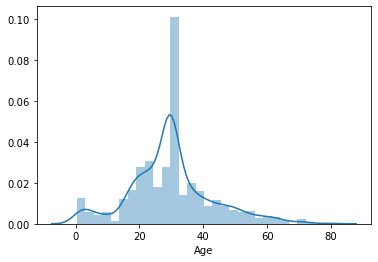

In [26]:
sns.distplot(titanic_df["Age"])

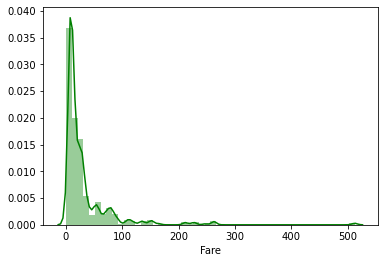

In [30]:
sns.distplot(titanic_df["Fare"],color="G")

3    491
1    216
2    184
Name: Pclass, dtype: int64


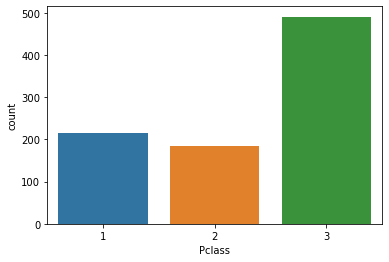

In [37]:
print(titanic_df["Pclass"].value_counts())
sns.countplot(titanic_df["Pclass"])

1    577
0    314
Name: Sex, dtype: int64


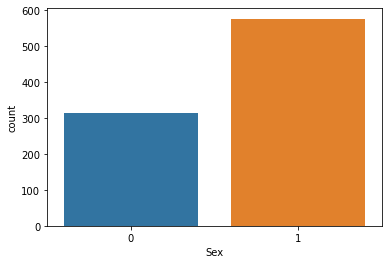

In [38]:
print(titanic_df["Sex"].value_counts())
sns.countplot(titanic_df["Sex"])

0    549
1    342
Name: Survived, dtype: int64


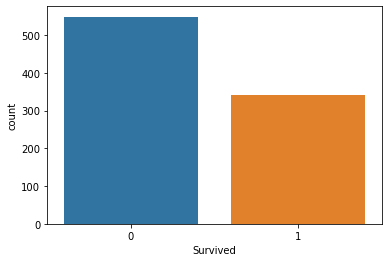

In [39]:
print(titanic_df["Survived"].value_counts())
sns.countplot(titanic_df["Survived"])

In [44]:
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

##  Model Building 


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
titanic_model = DecisionTreeClassifier()
titanic_model.fit(X_train,y_train)

DecisionTreeClassifier()

## Train Accuracy

In [50]:
titanic_model.score(X_train,y_train)

0.9775449101796407

## Test Accuracy

In [51]:
titanic_model.score(X_test,y_test)

0.8026905829596412

## Model Predictions

In [54]:
X_test[6:7]

,Pclass,Sex,Age,Fare
609,1,0,40.0,153.4625


In [55]:
y_test[6:7]

609    1
Name: Survived, dtype: int64

In [57]:
titanic_model.predict([[1,0,40.0,153.4625]])

array([1], dtype=int64)

## Decision Tree Classifier using Salaries Dataset

In [ ]:
# import dataset

In [59]:
salaries_df = pd.read_csv("D:\\Project\\CodeBasicsTasks\\DecisionTree\\salaries.csv")

In [60]:
salaries_df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [61]:
salaries_df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [62]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


## Visualization

facebook      6
google        6
abc pharma    4
Name: company, dtype: int64


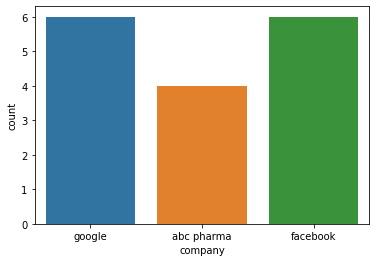

In [67]:
print(salaries_df["company"].value_counts())
sns.countplot(salaries_df["company"])

business manager       6
computer programmer    5
sales executive        5
Name: job, dtype: int64


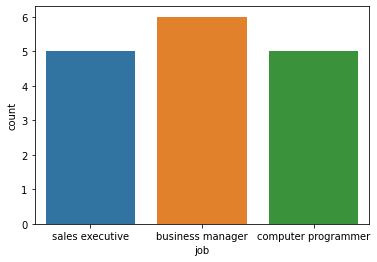

In [68]:

print(salaries_df["job"].value_counts())
sns.countplot(salaries_df["job"])

bachelors    8
masters      8
Name: degree, dtype: int64


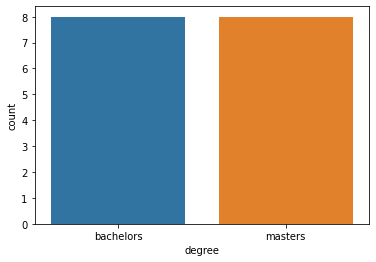

In [69]:

print(salaries_df["degree"].value_counts())
sns.countplot(salaries_df["degree"])

1    10
0     6
Name: salary_more_then_100k, dtype: int64


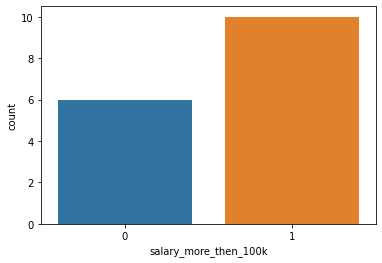

In [70]:

print(salaries_df["salary_more_then_100k"].value_counts())
sns.countplot(salaries_df["salary_more_then_100k"])

## Label Encoding

In [75]:
company = LabelEncoder()

In [77]:
salaries_df["company"] = company.fit_transform(salaries_df["company"])

In [78]:
job =LabelEncoder()

In [79]:
salaries_df["job"] = job.fit_transform(salaries_df["job"])

In [80]:
degree = LabelEncoder()

In [81]:
salaries_df["degree"] = degree.fit_transform(salaries_df["degree"])

In [82]:
salaries_df.head() 

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [86]:
X = salaries_df.drop("salary_more_then_100k",axis=1)
y= salaries_df["salary_more_then_100k"]

## Model Building

In [87]:
salaries_model = DecisionTreeClassifier()
salaries_model.fit(X,y)

DecisionTreeClassifier()

## Model Evaluation

In [ ]:
# Model Accuarcy

In [88]:
salaries_model.score(X,y)

1.0

## Model Prediction

In [89]:
X[5:7]

,company,job,degree
5,2,1,1
6,0,2,1


In [90]:
y[5:7]

5    1
6    0
Name: salary_more_then_100k, dtype: int64

In [91]:
salaries_model.predict([[2,1,1],[0,2,1]])

array([1, 0], dtype=int64)